# Vegan vs Carnivore Diet NLP

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from textblob import TextBlob
from matplotlib import pyplot as plt

## Analyzing Vegan Diet

In [2]:
# loading data into dataframe
df_vegan = pd.read_csv("Tweets_VeganDiet.csv")
df_vegan.head()

,Unnamed: 0,Tweets
0,0,@keanadianne Veganism is a lifestyle that incl...
1,1,@JasonVivier7 @SticksAndBr1cks I don't really ...
2,2,@keanadianne Because veganism includes the die...
3,3,please tell me how you’re on a vegan diet and ...
4,4,@keanadianne Incorrect. \nThe word Vegan was c...


In [3]:
# there might be some special characters
# for all this, lets create a function

def clean_text(text):
    text = re.sub(r"@[a-zA-z0-9]+", "", text)
    text = re.sub("[^a-zA-z]", " ", text)
    text = text.lower()
    text = re.sub("amp", "", text)
    return text

In [4]:
df_vegan["cleaned_tweets"] = df_vegan["Tweets"].apply(clean_text)

In [5]:
df_vegan.head()

,Unnamed: 0,Tweets,cleaned_tweets
0,0,@keanadianne Veganism is a lifestyle that incl...,veganism is a lifestyle that includes the die...
1,1,@JasonVivier7 @SticksAndBr1cks I don't really ...,i don t really attempt to manage anything i...
2,2,@keanadianne Because veganism includes the die...,because veganism includes the diet it s a li...
3,3,please tell me how you’re on a vegan diet and ...,please tell me how you re on a vegan diet and ...
4,4,@keanadianne Incorrect. \nThe word Vegan was c...,incorrect the word vegan was coined by the ...


In [6]:
# to further clean the tweets, lets remove the stopwords
def eliminate_stopwords_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    temp = text.split()
    temp = [lemmatizer.lemmatize(word) for word in temp if word not in stopwords.words("english")]
    temp = " ".join(temp)
    
    return temp

In [7]:
df_vegan["final_tweets"] = df_vegan["cleaned_tweets"].apply(eliminate_stopwords_lemmatize)

In [8]:
df_vegan.head()

,Unnamed: 0,Tweets,cleaned_tweets,final_tweets
0,0,@keanadianne Veganism is a lifestyle that incl...,veganism is a lifestyle that includes the die...,veganism lifestyle includes diet phrase coined...
1,1,@JasonVivier7 @SticksAndBr1cks I don't really ...,i don t really attempt to manage anything i...,really attempt manage anything im vegan animal...
2,2,@keanadianne Because veganism includes the die...,because veganism includes the diet it s a li...,veganism includes diet lifestyle also includes...
3,3,please tell me how you’re on a vegan diet and ...,please tell me how you re on a vegan diet and ...,please tell vegan diet eating dairy whip cream
4,4,@keanadianne Incorrect. \nThe word Vegan was c...,incorrect the word vegan was coined by the ...,incorrect word vegan coined vegan society dona...


In [9]:
# creating a function to get the subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [10]:
# creating a function to get the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [11]:
# creating new columns for subjectivity and polarity for each tweet
df_vegan["subjectivity"] = df_vegan["final_tweets"].apply(get_subjectivity)
df_vegan["polarity"] = df_vegan["final_tweets"].apply(get_polarity)

In [13]:
# lets clean the dataframe by dropping all the unnecessary columns
# copying the original dataframe to avoid mistakenly changing it and avoiding the warning
df_vegan_tweets = df_vegan.copy()

# dropping all the unwanted columns. This can be done in one line by specifying all the columns to drop function
df_vegan_tweets = df_vegan_tweets.drop(["Unnamed: 0"], axis=1)
df_vegan_tweets = df_vegan_tweets.drop(["Tweets"], axis=1)
df_vegan_tweets = df_vegan_tweets.drop(["cleaned_tweets"], axis=1)
# renaming the cleaned_tweets to tweets
df_vegan_tweets.rename(columns={"final_tweets":"tweets"}, inplace=True)

In [14]:
df_vegan_tweets.head()

,tweets,subjectivity,polarity
0,veganism lifestyle includes diet phrase coined...,0.000000,0.000000
1,really attempt manage anything im vegan animal...,0.258333,0.112500
2,veganism includes diet lifestyle also includes...,0.166667,-0.166667
3,please tell vegan diet eating dairy whip cream,0.000000,0.000000
4,incorrect word vegan coined vegan society dona...,0.000000,0.000000


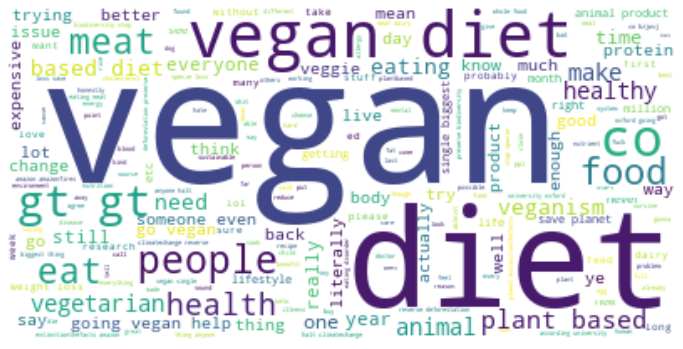

In [15]:
# lets create a word cloud to see the frequency of appearing words
words = " ".join([tweet for tweet in df_vegan_tweets["tweets"]])

# generating the word cloud from all the words got from the tweets
wordCloud = WordCloud(random_state=7, background_color="white").generate(words)

# plotting the word cloud
plt.figure(figsize=(12,14))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
# lets mark the sentiments to postive, negative or neutral based on the polarity score
def get_sentiment(polarity):
    if polarity == 0:
        return "Neutral"
    elif polarity > 0:
        return "Positive"
    else:
        return "Negative"

In [17]:
# applying the function to the polarity column and creating a new column called sentiment
df_vegan_tweets["sentiment"] = df_vegan_tweets["polarity"].apply(get_sentiment)

In [18]:
df_vegan_tweets.head()

,tweets,subjectivity,polarity,sentiment
0,veganism lifestyle includes diet phrase coined...,0.000000,0.000000,Neutral
1,really attempt manage anything im vegan animal...,0.258333,0.112500,Positive
2,veganism includes diet lifestyle also includes...,0.166667,-0.166667,Negative
3,please tell vegan diet eating dairy whip cream,0.000000,0.000000,Neutral
4,incorrect word vegan coined vegan society dona...,0.000000,0.000000,Neutral


Text(0, 0.5, 'Subjectivity')

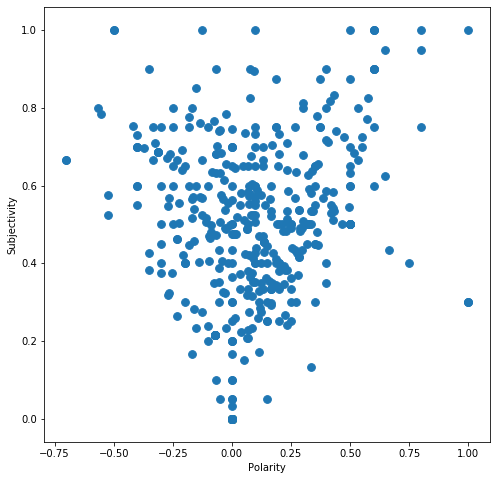

In [19]:
# to get a better understanding of the sentiments, lets plot them
plt.figure(figsize=(8,8))

plt.scatter(df_vegan_tweets["polarity"], df_vegan_tweets["subjectivity"], s=60)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

In [20]:
positives_vegan = df_vegan_tweets[df_vegan_tweets["sentiment"] == "Positive"].count() / df_vegan_tweets.count() * 100
print("Positive tweets: ", round(positives_vegan[0], 2), "%")
negatives_vegan = df_vegan_tweets[df_vegan_tweets["sentiment"] == "Negative"].count() / df_vegan_tweets.count() * 100
print("Negative tweets: ", round(negatives_vegan[0], 2), "%")
neutrals_vegan = df_vegan_tweets[df_vegan_tweets["sentiment"] == "Neutral"].count() / df_vegan_tweets.count() * 100
print("Neutral tweets: ", round(neutrals_vegan[0], 2), "%")

Positive tweets:  51.6 %
Negative tweets:  28.2 %
Neutral tweets:  20.2 %


## Analyzing Carnivore Diet

In [21]:
# loading data into dataframe
df_carnivore = pd.read_csv("Tweets_CarnivoreDiet.csv")
df_carnivore.head()

,Unnamed: 0,Tweets
0,0,Okay this is melt in your mouth goodness. All ...
1,1,@awright4645 @saladeaufromage I'm not promotin...
2,2,"""the carnivore diet is more sinister than you ..."
3,3,@meat_rx @donlayman @SBakerMD Meatrx how do we...
4,4,@awright4645 @saladeaufromage You've said your...


In [22]:
df_carnivore["cleaned_tweets"] = df_carnivore["Tweets"].apply(clean_text)

In [23]:
df_carnivore.head()

,Unnamed: 0,Tweets,cleaned_tweets
0,0,Okay this is melt in your mouth goodness. All ...,okay this is melt in your mouth goodness all ...
1,1,@awright4645 @saladeaufromage I'm not promotin...,i m not promoting it on that basis i m sayi...
2,2,"""the carnivore diet is more sinister than you ...",the carnivore diet is more sinister than you ...
3,3,@meat_rx @donlayman @SBakerMD Meatrx how do we...,meatrx how do we ask questions show r...
4,4,@awright4645 @saladeaufromage You've said your...,you ve said yourself that fewer people could...


In [25]:
df_carnivore["final_tweets"] = df_carnivore["cleaned_tweets"].apply(eliminate_stopwords_lemmatize)

In [26]:
df_carnivore.head()

,Unnamed: 0,Tweets,cleaned_tweets,final_tweets
0,0,Okay this is melt in your mouth goodness. All ...,okay this is melt in your mouth goodness all ...,okay melt mouth goodness hail carnivore diet h...
1,1,@awright4645 @saladeaufromage I'm not promotin...,i m not promoting it on that basis i m sayi...,promoting basis saying people choose improve h...
2,2,"""the carnivore diet is more sinister than you ...",the carnivore diet is more sinister than you ...,carnivore diet sinister think
3,3,@meat_rx @donlayman @SBakerMD Meatrx how do we...,meatrx how do we ask questions show r...,meatrx ask question show reply followup stuck ...
4,4,@awright4645 @saladeaufromage You've said your...,you ve said yourself that fewer people could...,said fewer people could fed carnivore diet tra...


In [27]:
# creating new columns for subjectivity and polarity for each tweet
df_carnivore["subjectivity"] = df_carnivore["final_tweets"].apply(get_subjectivity)
df_carnivore["polarity"] = df_carnivore["final_tweets"].apply(get_polarity)

In [28]:
# lets clean the dataframe by dropping all the unnecessary columns
# copying the original dataframe to avoid mistakenly changing it and avoiding the warning
df_carnivore_tweets = df_carnivore.copy()

# dropping all the unwanted columns. This can be done in one line by specifying all the columns to drop function
df_carnivore_tweets = df_carnivore_tweets.drop(["Unnamed: 0"], axis=1)
df_carnivore_tweets = df_carnivore_tweets.drop(["Tweets"], axis=1)
df_carnivore_tweets = df_carnivore_tweets.drop(["cleaned_tweets"], axis=1)
# renaming the cleaned_tweets to tweets
df_carnivore_tweets.rename(columns={"final_tweets":"tweets"}, inplace=True)

In [29]:
df_carnivore_tweets.head()

,tweets,subjectivity,polarity
0,okay melt mouth goodness hail carnivore diet h...,0.500000,0.500000
1,promoting basis saying people choose improve h...,0.595833,-0.104167
2,carnivore diet sinister think,1.000000,-0.500000
3,meatrx ask question show reply followup stuck ...,0.400000,0.366667
4,said fewer people could fed carnivore diet tra...,0.600000,0.231250


Text(0, 0.5, 'Subjectivity')

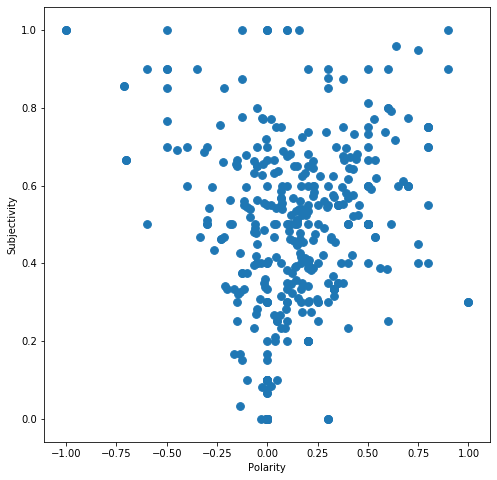

In [30]:
# to get a better understanding of the sentiments, lets plot them
plt.figure(figsize=(8,8))

plt.scatter(df_carnivore_tweets["polarity"], df_carnivore_tweets["subjectivity"], s=60)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

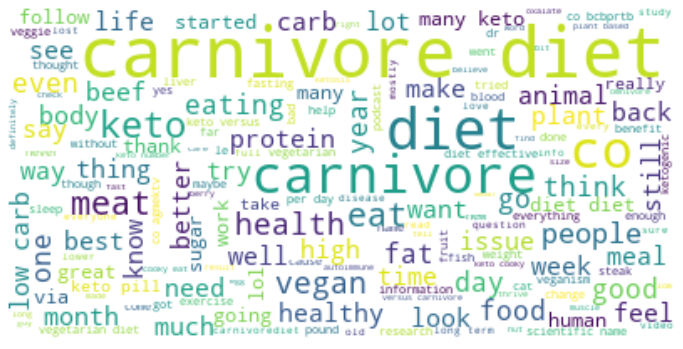

In [33]:
# lets create a word cloud to see the frequency of appearing words
words = " ".join([tweet for tweet in df_carnivore_tweets["tweets"]])

# generating the word cloud from all the words got from the tweets
wordCloud = WordCloud(random_state=7, background_color="white").generate(words)

# plotting the word cloud
plt.figure(figsize=(12,14))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
# applying the function to the polarity column and creating a new column called sentiment
df_carnivore_tweets["sentiment"] = df_carnivore_tweets["polarity"].apply(get_sentiment)

In [35]:
df_carnivore_tweets.head()

,tweets,subjectivity,polarity,sentiment
0,okay melt mouth goodness hail carnivore diet h...,0.500000,0.500000,Positive
1,promoting basis saying people choose improve h...,0.595833,-0.104167,Negative
2,carnivore diet sinister think,1.000000,-0.500000,Negative
3,meatrx ask question show reply followup stuck ...,0.400000,0.366667,Positive
4,said fewer people could fed carnivore diet tra...,0.600000,0.231250,Positive


In [36]:
positives_carnivore = df_carnivore_tweets[df_carnivore_tweets["sentiment"] == "Positive"].count() / df_carnivore_tweets.count() * 100
print("Positive tweets: ", round(positives_carnivore[0], 2), "%")
negatives_carnivore = df_carnivore_tweets[df_carnivore_tweets["sentiment"] == "Negative"].count() / df_carnivore_tweets.count() * 100
print("Negative tweets: ", round(negatives_carnivore[0], 2), "%")
neutrals_carnivore = df_carnivore_tweets[df_carnivore_tweets["sentiment"] == "Neutral"].count() / df_carnivore_tweets.count() * 100
print("Neutral tweets: ", round(neutrals_vegan[0], 2), "%")

Positive tweets:  53.2 %
Negative tweets:  20.4 %
Neutral tweets:  20.2 %


In [44]:
df_comparison = pd.DataFrame({"Positive": [positives_vegan[0], positives_carnivore[0]], 
                              "Negative": [negatives_vegan[0], negatives_carnivore[0]],
                              "Neutral": [neutrals_vegan[0], neutrals_carnivore[0]]
                             }, index=["Vegan Diet", "Carnivore Diet"]
                            )

In [45]:
df_comparison.head()

,Positive,Negative,Neutral
Vegan Diet,51.6,28.2,20.2
Carnivore Diet,53.2,20.4,26.4
